In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# Generate normal data (sine wave)
t = np.linspace(0, 100, 1000)
normal_data = np.sin(t) + 0.1 * np.random.randn(1000)

In [4]:
# Introduce anomalies (random spikes)
anomaly_indices = np.random.choice(1000, 50, replace=False)
anomalies = normal_data.copy()
anomalies[anomaly_indices] += np.random.uniform(3, 5, size=50)

In [5]:
# Combine normal and anomaly data
data = np.concatenate([normal_data, anomalies]).reshape(-1, 1)

In [6]:
# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
# Split data into training (normal only) and testing (normal + anomalies)
X_train, X_test = train_test_split(data_scaled[:1000], test_size=0.2, random_state=42)
X_test = np.concatenate([X_test, data_scaled[1000:]])  # Add anomalies to test set

In [8]:
# Fit DBSCAN model (fit only on normal data)
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X_train)

,eps,0.1
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [9]:
# Predict anomalies on test set
y_pred = dbscan.fit_predict(X_test)
anomalies = y_pred == -1

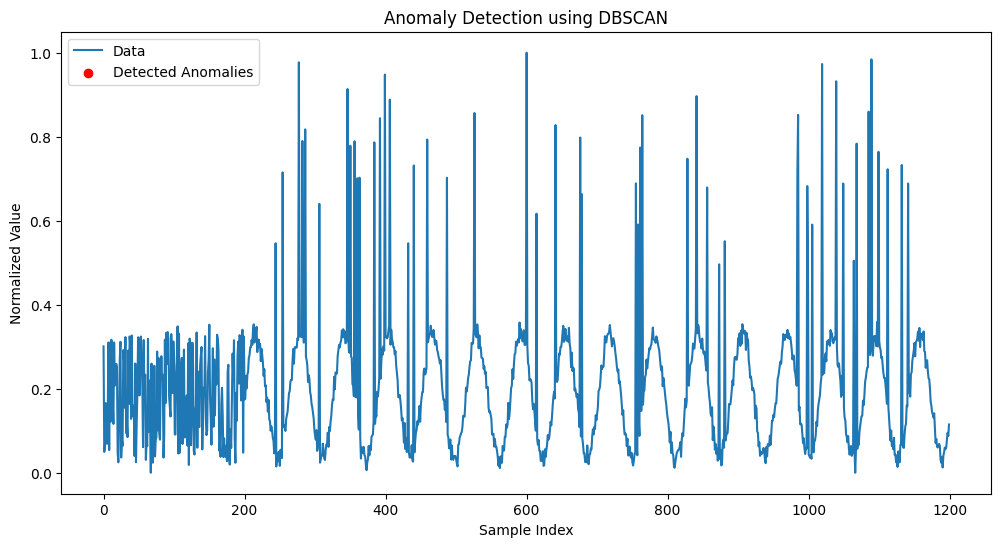

In [10]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(len(X_test)), X_test, label="Data")
plt.scatter(np.where(anomalies)[0], X_test[anomalies], color='r', label="Detected Anomalies")
plt.legend()
plt.title("Anomaly Detection using DBSCAN")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Value")
plt.show()

In [11]:
print(f"Total anomalies detected: {np.sum(anomalies)}")

Total anomalies detected: 0
